<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_Curso_R/blob/main/ERAP_R_Course_moduloIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

T√≠tulo: Manipulaci√≥n de datos con R - M√≥dulo III (Visualizaci√≥n de Datos con ggplot2)

Autor(es): Edna Viviana Segura Alvarado - Hans Mauricio Carrillo Hern√°ndez

Fecha: 2025-06

Instituci√≥n: Universidad de La Rioja

# ¬øQu√© es ggplot2?
ggplot2 es un paquete del lenguaje R para crear gr√°ficos de manera declarativa y elegante. Es parte del ecosistema **tidyverse** y est√° dise√±ado para generar gr√°ficos a partir de datos organizados en data frames (tibbles o similares) (tidy data).

Se basa en la Gram√°tica de los Gr√°ficos (Grammar of Graphics), que  establece un sistema coherente para construir visualizaciones a partir de componentes independientes que se pueden combinar.

A grandes rasgos, se compone de la siguiente manera:

```
ggplot(data = <datos>) +
  aes(x = <var_x>, y = <var_y>) +
  geom_<tipo>() +
  otros_componentes()

```
- La est√©tica o atributos-propiedades visuales de la geometr√≠a (**aes()**):

Define c√≥mo se *mapean* las variables de los datos a propiedades visuales del gr√°fico: posici√≥n en los ejes, color, forma, tama√±o, etc. No dibuja nada por s√≠ misma, solo establece qu√© variable va en qu√© parte del gr√°fico, lo que crea es el **lienzo**.

Por ejemplo en
```
aes(x = displ, y = hwy)
```
nos est√° diciendo que la variable **displ** (cilindrada del motor) ir√° en el eje **x** y **hwy** (rendimiento en autopista) ir√° en el eje **y**.


Valores est√©ticos comunes:

| Est√©tica        | ¬øD√≥nde se aplica?        | Tipo de variable    | Descripci√≥n                                                                                                                                                                                    |
| --------------- | ------------------------ | ------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`color`**     | Bordes (l√≠neas, puntos)  | Discreta o continua | Define el **color del contorno** de los elementos gr√°ficos, como puntos o l√≠neas. En variables categ√≥ricas, genera una paleta autom√°tica; en variables continuas, crea un gradiente.           |
| **`fill`**      | √Åreas (barras, cajas...) | Discreta o continua | Controla el **color de relleno** de formas cerradas: barras, cajas, pol√≠gonos. Muy √∫til en `geom_bar()`, `geom_boxplot()`, `geom_col()`...                                                     |
| **`size`**      | Puntos, l√≠neas           | Continua            | Controla el **tama√±o de los puntos o el grosor de l√≠neas**. Suele usarse para representar una tercera variable en gr√°ficos de dispersi√≥n.                                                      |
| **`linewidth`** | L√≠neas                   | Continua            | Define el **grosor de las l√≠neas** (equivalente a `size`, pero espec√≠fico para l√≠neas desde `ggplot2` v3.4+). Mejora la claridad al usar l√≠neas m√∫ltiples con distintos anchos.                |
| **`shape`**     | Puntos (`geom_point`)    | Discreta            | Determina la **forma del punto** (c√≠rculo, tri√°ngulo, cruz, etc.). Ideal para variables categ√≥ricas. Hay 25 formas disponibles, algunas con relleno (`fill`) y otras solo con borde (`color`). |



Es importante nota que los valores dentro de aes() deben ser columnas del conjunto de datos.


- La geometr√≠a de los elementos (**geom_*()**):

Cada funci√≥n geom_*() representa una capa geom√©trica: es decir, una forma gr√°fica que se dibuja sobre el gr√°fico (como puntos, l√≠neas, barras, cajas, etiquetas, etc.).

Estas capas se suman con el operador + para construir el gr√°fico de forma modular. Cada capa puede representar un aspecto distinto del gr√°fico (como datos individuales, promedios, tendencias...), y se pueden superponer unas a otras.

```
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point() +                          # Capa de puntos
  geom_smooth(method = "lm", se = FALSE) # Capa de l√≠nea de tendencia
```
En este ejemplo, el gr√°fico se compone de dos capas geom√©tricas superpuestas:
Una que muestra cada observaci√≥n como un punto (geom_point()), colocando puntos seg√∫n los valores de **x** e **y** definidos en aes(). Y otra que a√±ade una l√≠nea de regresi√≥n (geom_smooth()), calculada sobre los mismos datos.

**Nota:**
Podemos pensar en un gr√°fico como un "lienzo", donde cada geom_*() es una capa de pintura: podemos dibujar puntos, luego agregar l√≠neas, cajas, etiquetas... todo sobre la misma base.

**Geometr√≠as comunes (que iremos viendo seg√∫n el tipo de variable)**

| Geometr√≠a (`geom_*`)           | Tipo de variable X  | Tipo de variable Y  | Uso com√∫n                                           |
| ------------------------------ | ------------------- | ------------------- | --------------------------------------------------- |
| `geom_point()`                 | Continua o discreta | Continua            | Diagrama de dispersi√≥n                              |
| `geom_line()`                  | Continua            | Continua            | Serie temporal o curvas                             |
| `geom_smooth()`                | Continua            | Continua            | Tendencia o regresi√≥n                               |
| `geom_bar(stat = "count")`     | Discreta            | -                   | Conteo de categor√≠as                                |
| `geom_col()`                   | Discreta            | Continua            | Altura basada en valor num√©rico                     |
| `geom_boxplot()`               | Discreta            | Continua            | Comparar distribuciones                             |
| `geom_violin()`                | Discreta            | Continua            | Distribuciones suavizadas                           |
| `geom_histogram()`             | Continua            | -                   | Distribuci√≥n de frecuencias                         |
| `geom_density()`               | Continua            | -                   | Distribuci√≥n suavizada                              |
| `geom_area()`                  | Continua            | Continua            | √Årea bajo curva (acumulada)                         |
| `geom_jitter()`                | Discreta o continua | Continua            | Puntos dispersos con ruido para evitar solapamiento |
| `geom_boxplot()`               | Discreta (x)        | Continua (y)        | Comparaci√≥n de rangos y medianas                    |
| `geom_dotplot()`               | Discreta            | Discreta o continua | Distribuci√≥n por acumulaci√≥n de puntos              |
| `geom_tile()`                  | Discreta            | Discreta            | Mapa de calor con categor√≠as                        |
| `geom_rug()`                   | Continua            | -                   | Indicadores marginales en los ejes                  |
| `geom_text()` / `geom_label()` | Discreta o continua | Discreta o continua | A√±adir etiquetas a los puntos                       |



In [7]:
# @title Librer√≠as: (Instalaci√≥n e importaci√≥n)

# Funci√≥n para instalar si no est√° instalado
instalar_si_no <- function(paquete) {
    if (!requireNamespace(paquete, quietly = TRUE)) {
    install.packages(paquete, repos = "https://cloud.r-project.org")
  }
  library(paquete, character.only = TRUE)
}

# Lista de paquetes a verificar
paquetes <- c("rnaturalearth", "rnaturalearthdata", "sf", "dplyr", "ggplot2", "devtools", "maps", "nycflights13")

# Instalar y cargar todos
invisible(lapply(paquetes, instalar_si_no))
devtools::install_github("ropensci/rnaturalearthhires")

# Cargar paquetes
# library(sf) sf = Simple Features, es un est√°ndar internacional (ISO)
# para representar objetos geogr√°ficos como puntos, l√≠neas, pol√≠gonos, etc.
# library(rnaturalearth) y library(rnaturalearthdata) # Son paquetes que permiten descargar
# y cargar mapas vectoriales del mundo (pa√≠ses, estados, r√≠os, etc.) desde el proyecto Natural Earth
#library(maps)Carga mapas de estados y regiones de EEUU


Attaching package: ‚Äòrnaturalearthdata‚Äô


The following object is masked from ‚Äòpackage:rnaturalearth‚Äô:

    countries110


Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.3.1; sf_use_s2() is TRUE


Attaching package: ‚Äòdplyr‚Äô


The following objects are masked from ‚Äòpackage:stats‚Äô:

    filter, lag


The following objects are masked from ‚Äòpackage:base‚Äô:

    intersect, setdiff, setequal, union


Loading required package: usethis

Skipping install of 'rnaturalearthhires' from a github remote, the SHA1 (153b0ea5) has not changed since last install.
  Use `force = TRUE` to force installation



Veremos un ejemplo con datos de laboratorio (datos inclu√≠dos en la librer√≠a ggplo2).

**Conjunto de datos: mpg**

El dataset mpg proviene del paquete ggplot2 y contiene informaci√≥n sobre el rendimiento de modelos de autom√≥viles en EE.UU., recogida por la Agencia de Protecci√≥n Ambiental (EPA). Es ideal para aprender a visualizar relaciones entre variables cuantitativas y cualitativas.


| Variable       | Tipo              | Descripci√≥n                                                             |
| -------------- | ----------------- | ----------------------------------------------------------------------- |
| `manufacturer` | Categ√≥rica        | Marca del autom√≥vil (ej. "audi", "ford")                                |
| `model`        | Categ√≥rica        | Modelo del veh√≠culo                                                     |
| `displ`        | Num√©rica continua | Cilindrada del motor (en litros)                                        |
| `year`         | Num√©rica discreta | A√±o de fabricaci√≥n (1999 o 2008)                                        |
| `cyl`          | Num√©rica discreta | N√∫mero de cilindros del motor                                           |
| `trans`        | Categ√≥rica        | Tipo de transmisi√≥n (autom√°tica/manual)                                 |
| `drv`          | Categ√≥rica        | Tipo de tracci√≥n (`f` = delantera, `r` = trasera, `4` = tracci√≥n total) |
| `cty`          | Num√©rica continua | Consumo de combustible en ciudad (millas por gal√≥n)                     |
| `hwy`          | Num√©rica continua | Consumo de combustible en autopista (mpg)                               |
| `fl`           | Categ√≥rica        | Tipo de combustible (`p` = gasolina, `d` = di√©sel, etc.)                |
| `class`        | Categ√≥rica        | Clase del veh√≠culo (compacto, SUV, minivan...)                          |


Comenzamos conla creaci√≥n de diferentes gr√°ficos:

¬øQu√© tipo de relaci√≥n vemos entre estas dos variables?:

En general, motores m√°s grandes (m√°s cilindrada) consumen m√°s combustible, lo que se traduce en menor rendimiento en autopista. Este patr√≥n es esperable, y el gr√°fico lo representa de forma clara y visual.

## Ejercicios:

### Una variable continua:

1. Realiza un gr√°fico de dispersi√≥n del consumo de combutible en autopista en funci√≥n del n√∫mero de cilindros del motor

2. ¬øQu√© sucede si hacemos un gr√°fico de dispersi√≥n de la variable *clase* versus tipo de traccion?

3. Crear un gr√°fico de densidad para la variable rendimiento en autopista

4. Crear un diagrama de puntos agrupados para el rendimiento en la autopista, explorar opciones para cambiar el relleno de negro a rosa ( o al color deseado).

5. Crear un poligono de frecuencias para el rendimiento en la autopista, explorar opciones para cambiar el color y grosor de la l√≠nea.

### Una variable discreta:

1. Generar un gr√°fico para el conteo de las frecuencias de la variable clase. Explorar las opciones disponibles para cambiar el color del relleno y de los bordes de las barras.

### Geometr√≠as para representar dos variables continuas.

Estas permiten analizar la relaci√≥n entre variables num√©ricas.

1. Crear un gr√°fico de dispersi√≥n cl√°sico entre cilindrada y rendimiento en autopista, modificando la forma, el color del relleno, el color del borde, el grosor del borde y el tama√±o de los puntos.

2. Generar un gr√°fico geom_jitter para la comparaci√≥n entre cilindrada y rendimiento en autopista y compara el resultado con el gr√°fico geom_point().

Modifica los par√°metros ( width, height, size,   color, alpha, shape, fill, y stroke)

¬øQu√© diferencias observas?
¬øQu√© utilidad le ves?



| Caracter√≠stica                | `geom_point()`                | `geom_jitter()`                                          |
| ----------------------------- | ----------------------------- | -------------------------------------------------------- |
| Precisi√≥n de ubicaci√≥n        | Alta (usa valores exactos)    | Baja (introduce desplazamiento aleatorio)                |
| Visualizaci√≥n de solapamiento | Baja (puntos se sobreponen)   | Alta (puntos se dispersan visualmente)                   |
| Ideal para...                 | Datos √∫nicos o sin repetici√≥n | Datos con muchas observaciones id√©nticas o discretizadas |


3. Realiza un diagrama de manta o tapete:

**geom_rug()** a√±ade peque√±as marcas (como alfileres o "tapetes") en los bordes del gr√°fico para mostrar d√≥nde hay observaciones individuales en cada eje.

Las rayitas negras a lo largo de la parte inferior indican los valores donde hay autos con esa cilindrada.

Si se ven muchas rayas muy juntas o superpuestas, significa que muchos autos tienen la misma cilindrada o muy similares.

Las marcas en el borde izquierdo indican las observaciones seg√∫n su rendimiento en autopista.

Si una raya es m√°s gruesa o m√°s intensa, puede ser que varias observaciones compartan ese mismo valor.

Comparativa de los tres gr√°ficos juntos:

| Geometr√≠a       | ¬øQu√© muestra?                        | ¬øCu√°ndo usar?                        |
| --------------- | ------------------------------------ | --------------------------------------- |
| `geom_point()`  | Relaci√≥n precisa entre dos variables | No hay mucho solapamiento               |
| `geom_jitter()` | Relaci√≥n dispersa (con ruido visual) | Hay valores repetidos que se solapan    |
| `geom_rug()`    | Densidad marginal en cada eje        | Cuando se quiere reforzar la idea de acumulaci√≥n |


### Geometr√≠as para representar dos variables (una continua y una discreta).

1. Diagrama de barras **geom_col()**: Generar un diagrama de barras que muestre el rendimiento promedio en autopista (hwy) de los autom√≥viles agrupados por su clase (class), como SUV, compacto, minivan, etc. Modifica atributos de la funci√≥n.


Es ideal para mostrar comparaci√≥n directa de valores agregados por grupo.

2. geom_boxplot() ‚Äì Diagrama de caja y bigotes:
   **geom_boxplot()** resume una variable continua mostrando su mediana, cuartiles y posibles valores at√≠picos por grupo.

Escribe el c√≥digo para generar un diagrama de caja que muestre la distribuci√≥n del rendimiento en autopista (hwy) de los veh√≠culos, agrupados por su clase (class).
Modificar los par√°metros necesarios para cambiar el color del relleno, color de los valores extremos, ancho de las cajas, etc.

¬øC√≥mo puedo agregar el valor de la media a cada caja?


Cada caja representa el rango intercuart√≠lico (del primer al tercer cuartil), la l√≠nea dentro de la caja indica la mediana, y los bigotes se extienden hasta 1.5 veces el rango intercuart√≠lico.
Este tipo de gr√°fico facilita la comparaci√≥n de la dispersi√≥n, la simetr√≠a y la presencia de valores extremos en distintos grupos.

3. geom_violin() ‚Äì Densidad suavizada por grupo:

**geom_violin()** combina la funcionalidad de un boxplot con un gr√°fico de densidad. Muestra la forma de la distribuci√≥n por categor√≠a.

Crea un gr√°fico de viol√≠n para visualizar la distribuci√≥n del rendimiento en autopista (hwy) de los autom√≥viles, agrupados por su clase (class). Modifica distintas opciones de relleno, transparencia, mostrar cuartiles.

Este tipo de gr√°fico combina la informaci√≥n de un boxplot (mediana, cuartiles) con una estimaci√≥n de densidad suavizada, permitiendo observar la forma de la distribuci√≥n (asimetr√≠as, concentraci√≥n de valores, presencia de m√∫ltiples modas).
Cada "viol√≠n" representa la densidad de valores a lo largo del eje vertical, mostrando con mayor grosor las zonas donde se concentran m√°s observaciones.

A continuaci√≥n podemos ver un ejemplo de **suma de capas geom√©tricas**, mezclando boxplot, violin y stat_summary.
Modifica distintos par√°metros de las geometr√≠as, e iintercambia el orden.

**NOTA**

Vemos que los l√≠mites son la creatividad.

### Diferencias entre Atributos y Mapeos:

**Mapeos**: un mapeo est√©tico es una asignaci√≥n de una variable de los datos a una propiedad visual del gr√°fico: posici√≥n, color, tama√±o, forma, etc, que se define dentro de la funci√≥n aes().
Por ejemplo,


```
ggplot(mpg, aes(x = displ, y = hwy, color = class))
```
Vemos que el eje **x** mostrar√° displ (cilindrada), y el eje **y** mostrar√° hwy (rendimiento en autopista).
El color de los puntos depender√° de la variable class (clase del veh√≠culo). En este caso, cada grupo de datos tendr√° un color distinto autom√°ticamente, y se generar√° una leyenda.

**Atributos fijos**: un atributo fijo es un valor visual que se asigna manualmente, igual para todos los datos, y se coloca fuera de aes().
Por ejemplo:


```
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point(color = "steelblue", size = 3)
```
Todos los puntos tendr√°n el mismo color (steelblue), y todos los puntos tendr√°n el mismo tama√±o (3). As√≠ mismo, no se genera leyenda, porque no hay relaci√≥n con ninguna variable.



**Resumen comparativo:**


| Caracter√≠stica         | **Mapeo (`aes()`)**                | **Atributo fijo (fuera de `aes()`)** |
| ---------------------- | ---------------------------------- | ------------------------------------ |
| Se relaciona con datos | S√≠                               |  No                                 |
| Se define en `aes()`   | S√≠                               |  No                                 |
| Genera leyenda         | S√≠ (si es visual)                |  No                                 |
| Permite variaci√≥n      | Cada punto puede verse diferente |  Todos los puntos se ven igual      |
| Ejemplo                | `aes(color = class)`               | `color = "red"`                      |


Es decir, cuando usamos aes(), le decimos a ggplot2 que tome una **variable del dataset** y la convierta en una **propiedad visual** del gr√°fico. En cambio, cuando usamos un **atributo fijo**, estamos asignando manualmente un valor constante a esa **propiedad** para todos los elementos del gr√°fico.

Veamos un ejemplo paso a paso de un diagrama de puntos entre :

## Etiquetas:

Las etiquetas en ggplot2 se controlan principalmente mediante la funci√≥n **labs()**, que permite personalizar los t√≠tulos y descripciones de los ejes y otros elementos del gr√°fico.

| Par√°metro  | Qu√© etiqueta modifica                    |
| ---------- | ---------------------------------------- |
| `title`    | T√≠tulo principal del gr√°fico             |
| `subtitle` | Subt√≠tulo debajo del t√≠tulo              |
| `caption`  | Texto explicativo en la esquina inferior |
| `x`        | Etiqueta del eje X                       |
| `y`        | Etiqueta del eje Y                       |
| `fill`     | Etiqueta de la leyenda para `fill`       |
| `color`    | Etiqueta de la leyenda para `color`      |
| `size`     | Etiqueta de la leyenda para `size`       |
| `shape`    | Etiqueta de la leyenda para `shape`      |
| `linetype` | Etiqueta de la leyenda para `linetype`   |


Usar **labs()** es equivalente a poner las etiquetas directamente en ggtitle(), xlab(), ylab(), pero m√°s limpio y centralizado.

Se puede usar al final de la cadena + para que se aplique a todo el gr√°fico.

Si se necesita eliminar una etiqueta, debe pasarse como NULL (por ejemplo, x = NULL).

## FACETS:

Facets son una forma de dividir un gr√°fico en varios subgr√°ficos m√°s peque√±os (tambi√©n llamados paneles-rejillas), cada uno mostrando un subconjunto de los datos.

Es como crear una cuadr√≠cula de gr√°ficos, donde cada uno representa un grupo diferente seg√∫n una variable categ√≥rica.

Por ejemplo, imaginemos que queremos conocer el consumo de combustible de coches, viendo un gr√°fico de dispersi√≥n por cada tipo de transmisi√≥n (auto, manual). En vez de hacer un gr√°fico nuevo para cada uno, ggplot2 los divide autom√°ticamente en paneles peque√±os usando facet_wrap() o facet_grid().

### Tipos de facet
1. facet_wrap(~ variable)

Crea una fila o rejilla de paneles seg√∫n una √∫nica variable categ√≥rica. Es el m√°s com√∫n y f√°cil de usar.

Por ejemplo, si queremos ver el consumo de combustible en funci√≥n de la cilindrada del coche segmentado por las clases de coche, debemos hacer un c√≥digo como el que sigue:

Esto divide el gr√°fico en un panel por cada clase de veh√≠culo (compact, suv, etc.).

2. facet_grid(fila ~ columna)

Permite dividir los paneles en dos dimensiones, por filas y columnas. Ideal para explorar la combinaci√≥n de dos variables categ√≥ricas.

Este c√≥digo crea una matriz de gr√°ficos donde las filas representan tipos de tracci√≥n (drv) y las columnas el n√∫mero de cilindros (cyl).

Se puede realizar **personalizaci√≥n de facets**:

Modificando etiquetas, t√≠tulos, escalas, etc.

- scales = "free": Permite que cada panel tenga sus propios ejes.
- labeller = label_both: Muestra tanto el nombre de la variable como el valor.

```
facet_wrap(~ class, scales = "free", labeller = label_both)
```



Cuando usas facet_wrap() o facet_grid() para crear m√∫ltiples paneles (uno por grupo), por defecto todos los gr√°ficos comparten los mismos ejes x e y. Esto ayuda a comparar, pero puede no ser √∫til si los rangos son muy diferentes entre grupos.

Ah√≠ es donde entra **scales = "free"**: que permite liberar los ejes para que cada panel tenga su propio rango.

En el ejemplo a acontinuaci√≥n, cada panel (class) ajusta sus propios ejes para adaptarse mejor a los datos.

Esto es √∫til cuando algunos grupos tienen valores muy altos y otros muy bajos, y se perder√≠an los detalles si todos usaran la misma escala.

**Otras opciones de scales**

| Opci√≥n                  | ¬øQu√© hace?                                            |
| ----------------------- | ----------------------------------------------------- |
| `"fixed"` (por defecto) | Todos los paneles comparten los mismos ejes.          |
| `"free"`                | Libera ambos ejes (`x` e `y`).                        |
| `"free_x"`              | Solo libera el eje **x**; el eje y se mantiene com√∫n. |
| `"free_y"`              | Solo libera el eje **y**; el eje x se mantiene com√∫n. |


## Temas (Themes):

En ggplot2, los temas son plantillas que controlan el estilo visual de un gr√°fico, es decir:

- Colores de fondo
- L√≠neas de cuadr√≠cula
- Tipos de letra
- Bordes de paneles
- Posici√≥n de leyendas
- Tama√±os y estilos de texto
- M√°rgenes, t√≠tulos, etc.

**Importante**: Los temas no afectan los datos ni el tipo de gr√°fico, solo cambian su apariencia est√©tica.

Los **temas** se aplican con la funci√≥n theme_*() al final de la cadena del gr√°fico:

```
ggplot(...) +
  geom_point(...) +
  theme_minimal()
```

Los temas predefinidos en ggplot2:

| Tema              | Descripci√≥n breve                                                   |
| ----------------- | ------------------------------------------------------------------- |
| `theme_gray()`    | Tema por defecto (con fondo gris y cuadr√≠cula blanca)               |
| `theme_bw()`      | Fondo blanco con bordes y cuadr√≠culas m√°s marcados                  |
| `theme_minimal()` | Muy simple, sin bordes ni cuadr√≠cula de fondo                       |
| `theme_classic()` | Estilo cl√°sico: ejes visibles, sin fondo ni cuadr√≠culas             |
| `theme_light()`   | Fondo blanco con cuadr√≠culas claras                                 |
| `theme_dark()`    | Fondo oscuro (√∫til para pantallas o contrastes fuertes)             |
| `theme_void()`    | Casi vac√≠o, sin ejes, etiquetas ni cuadr√≠cula (gr√°ficos art√≠sticos) |



**¬øEn qu√© consiste element_text()?**

element_text() es una funci√≥n que define el estilo visual de un texto en un gr√°fico ggplot2.

Se usa dentro de theme() para controlar c√≥mo se ve cada componente textual del gr√°fico: tama√±o de letra, color, alineaci√≥n, tipo de fuente, √°ngulo, etc.

¬øEn d√≥nde se usa?

| Parte del gr√°fico    | Clave en `theme()` |
| -------------------- | ------------------ |
| T√≠tulo               | `plot.title`       |
| Subt√≠tulo            | `plot.subtitle`    |
| Etiqueta eje X       | `axis.title.x`     |
| Etiqueta eje Y       | `axis.title.y`     |
| Texto de ticks eje X | `axis.text.x`      |
| Texto de ticks eje Y | `axis.text.y`      |
| T√≠tulo de leyenda    | `legend.title`     |
| Texto de leyenda     | `legend.text`      |
| Fuente o caption     | `plot.caption`     |

¬øQu√© atributos tiene element_text()?:

| Atributo     | Qu√© controla                                           | Ejemplo            |
| ------------ | ------------------------------------------------------ | ------------------ |
| `size`       | Tama√±o del texto (en puntos)                           | `size = 14`        |
| `face`       | Tipo de fuente: `"plain"`, `"bold"`, etc.              | `face = "bold"`    |
| `color`      | Color del texto                                        | `color = "blue"`   |
| `hjust`      | Alineaci√≥n horizontal (0 = izq, 0.5 = centro, 1 = der) | `hjust = 0.5`      |
| `vjust`      | Alineaci√≥n vertical                                    | `vjust = 1`        |
| `angle`      | Rotaci√≥n del texto (en grados)                         | `angle = 45`       |
| `family`     | Fuente del texto                                       | `family = "Times"` |
| `lineheight` | Espaciado entre l√≠neas                                 | `lineheight = 1.2` |


Por ejemplo:

Si quiero personalizar tambi√©n el eje x, el eje y...:

# Ejemplo de creaci√≥n del mapa de un pa√≠s

(Ejercicio iniciado en el m√≥dulo I)


Warning message:
‚ÄúRemoved 7 rows containing missing values or values outside the scale range
(`geom_segment()`).‚Äù


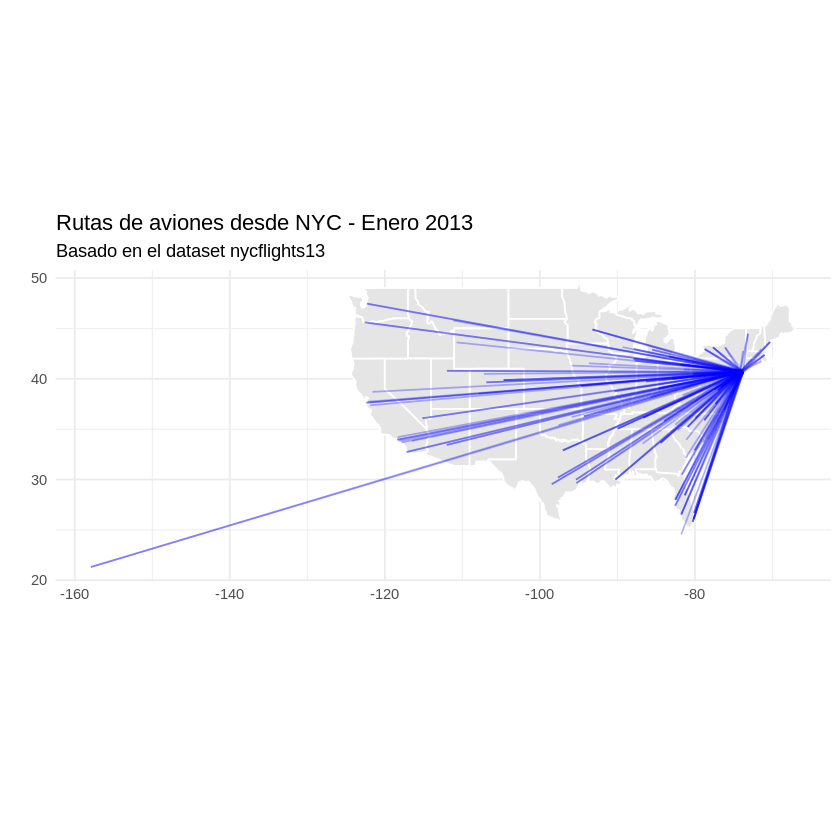

In [8]:
# 1. Filtrar vuelos desde NYC en enero de 2013
vuelos_ny <- flights %>%
  filter(month == 1) %>%         # Filtrar solo vuelos de enero
  select(origin, dest) %>%       # Seleccionar columnas de origen y destino
  distinct()                     # Eliminar duplicados para tener rutas √∫nicas

# 2. Obtener coordenadas de los aeropuertos de origen
origenes <- vuelos_ny %>%
  select(faa = origin) %>%       # Renombrar columna para hacer join
  distinct() %>%                 # Asegurar que no haya duplicados
  left_join(airports, by = "faa") %>%  # Unir con tabla de aeropuertos
  select(faa,                   # Seleccionar identificador del aeropuerto
         lon_origen = lon,     # Renombrar longitud del origen
         lat_origen = lat)     # Renombrar latitud del origen

# 2b. Obtener coordenadas de los aeropuertos de destino
destinos <- vuelos_ny %>%
  select(faa = dest) %>%        # Renombrar columna para hacer join
  distinct() %>%
  left_join(airports, by = "faa") %>%
  select(faa,                   # Seleccionar identificador del aeropuerto
         lon_dest = lon,       # Renombrar longitud del destino
         lat_dest = lat)       # Renombrar latitud del destino

# 2c. Unir coordenadas de origen y destino a cada ruta
rutas <- vuelos_ny %>%
  left_join(origenes, by = c("origin" = "faa")) %>%  # A√±adir coordenadas de origen
  left_join(destinos, by = c("dest" = "faa"))        # A√±adir coordenadas de destino

# 3. Crear mapa base de los Estados Unidos
usa <- map_data("state")  # Datos del contorno de los estados de EE.UU.

# 4. Dibujar el mapa con las rutas de vuelo
ggplot() +
  # Mapa base en gris claro, con bordes blancos
  geom_polygon(data = usa, aes(x = long, y = lat, group = group),
               fill = "gray90", color = "white") +
  # Rutas de vuelo como l√≠neas desde origen hasta destino
  geom_segment(data = rutas,
               aes(x = lon_origen, y = lat_origen,    # punto de inicio
                   xend = lon_dest, yend = lat_dest), # punto final
               color = "blue", alpha = 0.3) +         # l√≠neas azules semitransparentes
  # Mantener proporci√≥n entre latitud y longitud
  coord_fixed(1.3) +
  # T√≠tulos y etiquetas
  labs(title = "Rutas de aviones desde NYC - Enero 2013",
       subtitle = "Basado en el dataset nycflights13",
       x = "", y = "") +
  # Tema visual minimalista
  theme_minimal()


**geom_polygon()**

Dibuja pol√≠gonos cerrados uniendo puntos (x, y) en orden, y rellen√°ndolos con color.

Sintasis b√°sica:

```
geom_polygon(data = datos, aes(x = long, y = lat, group = group), fill = "gray", color = "white")

```

- x, y: coordenadas de los puntos del pol√≠gono.

- group: indica qu√© puntos forman parte del mismo pol√≠gono.

- fill: color del interior.

- color: color del borde.

**geom_segment()**

Dibuja segmentos de l√≠nea recta entre dos puntos: uno inicial (x, y) y uno final (xend, yend).

Sint√°xis b√°sica:

```
geom_segment(aes(x = lon_origen, y = lat_origen, xend = lon_dest, yend = lat_dest),
             color = "blue", alpha = 0.5)

```

- x, y: coordenadas del punto de partida.

- xend, yend: coordenadas del punto de llegada.

- color: color de la l√≠nea.

- alpha: transparencia (0 = invisible, 1 = opaco).

**coord_fixed()**

Fija la relaci√≥n de aspecto entre los ejes x e y, de forma que 1 unidad en x es igual a 1 unidad en y.

Sinht√°xis b√°sica:

```
coord_fixed(ratio = 1.3)
```
- ratio: relaci√≥n entre y / x. Por ejemplo, 1 = proporci√≥n 1:1; 1.3 estira verticalmente un poco.



**Ejemplo mapa de Espa√±a**

Analicemos la poblaci√≥n por comunidad aut√≥noma

Datos tomados del INE:

[INE-Datos demogr√°ficos 2021](https://www.ine.es/jaxiT3/Datos.htm?t=2853#_tabs-tabla)

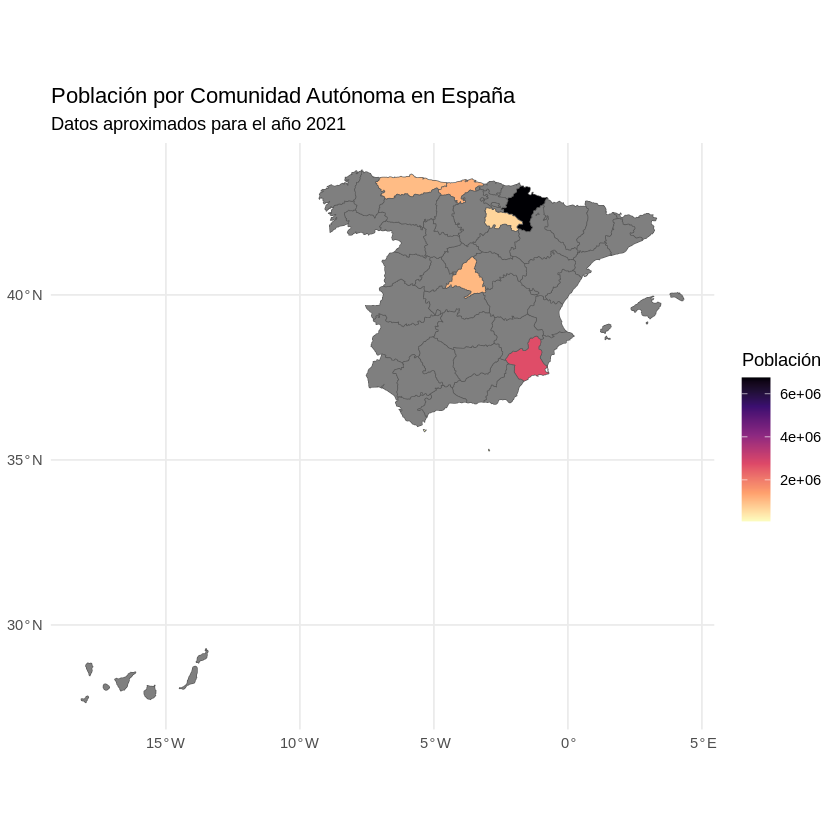

In [14]:
# 1. Obtener mapa de Espa√±a a nivel de regiones administrativas (comunidades aut√≥nomas)
# La funci√≥n ne_states() descarga un mapa en formato sf desde Natural Earth
espana_mapa <- ne_states(country = "Spain", returnclass = "sf")

# 2. Crear una tabla con datos demogr√°ficos: poblaci√≥n por comunidad aut√≥noma
# Esta tabla se usar√° para unirse al mapa, por el nombre de la regi√≥n (columna "name")
poblacion <- data.frame(
  name = c("Andaluc√≠a", "Arag√≥n", "Asturias", "Cantabria", "Castilla y Le√≥n",
           "Castilla-La Mancha", "Catalu√±a", "Comunidad Valenciana",
           "Extremadura", "Galicia", "Madrid", "Murcia",
           "Navarra", "Pa√≠s Vasco", "La Rioja", "Islas Baleares", "Islas Canarias", "Ceuta", "Melilla"),
  poblacion = c(8472407,	1326261,	1011792,	1173008,	2172944,	584507,	2383139,
  2049562,	7763362,	5058138,	1059501,	2695645,	6751251,	1518486,
  661537,	2213993,	319796,	83517,	86261)
)

# 3. Unir el mapa con la tabla de poblaci√≥n
# La uni√≥n se hace por la columna "name", que identifica cada regi√≥n en el mapa
mapa_completo <- espana_mapa %>%
  left_join(poblacion, by = "name")

# 4. Crear el gr√°fico con ggplot2
ggplot(data = mapa_completo) +
  # geom_sf dibuja los pol√≠gonos geogr√°ficos usando la geometr√≠a incluida en el objeto sf
  geom_sf(aes(fill = poblacion)) +
  # Usamos una escala de color continua "plasma" (de viridis) para representar la poblaci√≥n
  scale_fill_viridis_c(option = "magma", direction = -1, name = "Poblaci√≥n") +
  # T√≠tulos y leyenda del gr√°fico
  labs(title = "Poblaci√≥n por Comunidad Aut√≥noma en Espa√±a",
       subtitle = "Datos aproximados para el a√±o 2021",
       fill = "Poblaci√≥n") +
  # Tema minimalista para una apariencia limpia
  theme_minimal()


**geom_sf()**

Permite dibujar directamente geometr√≠as espaciales (puntos, l√≠neas, pol√≠gonos) almacenadas en objetos sf, sin necesidad de especificar x e y manualmente.

```
ggplot(data = objeto_sf) +
  geom_sf(aes(fill = variable))

```

| Elemento              | Explicaci√≥n                                                                      |
| --------------------- | -------------------------------------------------------------------------------- |
| `data = objeto_sf`    | Objeto de clase `sf`, como uno obtenido con `ne_states()` o `st_read()`          |
| `aes(fill = ...)`     | Variable continua o categ√≥rica para rellenar los pol√≠gonos                       |
| `color`               | Color del borde del pol√≠gono                                                     |
| `size`                | Grosor del borde                                                                 |
| `alpha`               | Transparencia                                                                    |
| `geometry = geometry` | (opcional) columna `sf` que contiene la geometr√≠a (por defecto es autodetectada) |



**scale_fill_viridis_c()**

Aplica una paleta de colores perceptualmente uniforme proveniente del paquete viridis.

| Argumento   | ¬øQu√© hace?                                                                                                               |
| ----------- | ------------------------------------------------------------------------------------------------------------------------ |
| `option`    | Elige la paleta de colores. Valores comunes: `"viridis"` (por defecto), `"plasma"`, `"magma"`, `"inferno"`, `"cividis"`. |
| `direction` | Cambia la direcci√≥n de la escala: `1` (normal) o `-1` (invertida).                                                       |
| `name`      | Cambia el nombre de la leyenda.                                                                                          |
| `limits`    | Fija los valores m√≠nimo y m√°ximo de la escala.                                                                           |
| `na.value`  | Color para valores faltantes (`NA`).                                                                                     |


# Ejercicios:

1. Clasifique el conjunto de datos entre variables continuas y discretas. Asigne una variable continua al color, al tama√±o y a la forma. ¬øC√≥mo se comportan estas est√©ticas de forma diferente para las variables categ√≥ricas y las continuas?

2. ¬øQu√© ocurre si se asigna la misma variable a varias est√©ticas?


Cuando se asigna la misma variable a m√°s de una est√©tica dentro de aes(), ggplot2 utiliza esa variable en cada uno de los canales visuales correspondientes. Esto significa que la variable afectar√° a m√∫ltiples aspectos de la geometr√≠a, como el color, el tama√±o, la forma o la posici√≥n.

3. ¬øQu√© hace la est√©tica stroke en ggplot2?

soluci√≥n abajo en las ayudas, se puede buscar en internet (en ayuda tambi√©n de r)

4.  ¬øQu√© ocurre si asignas una est√©tica a algo que no es una variable, como aes(color = displ < 5)?

La expresi√≥n **displ < 5** se eval√∫a para cada fila del dataset mpg.

El resultado es una nueva variable l√≥gica (TRUE o FALSE).

ggplot2 mapea esos valores l√≥gicos a colores, por lo general usando dos colores contrastantes.

En este ejemplo:
Puntos con displ < 5 se ven de un color (por ejemplo, azul)
Puntos con displ >= 5 se ven de otro (por ejemplo, rojo)

Esto permite crear agrupaciones visuales sin necesidad de modificar el dataset original.

5. ¬øQu√© ocurre si se aplica una faceta a una variable continua?

Cuando se aplica una faceta (facet_wrap() o facet_grid()) a una variable continua, ggplot2 forzar√° a esa variable a comportarse como si fuera categ√≥rica, es decir, la convertir√° internamente en factor.

Esto significa que: cada valor √∫nico de la variable continua se tratar√° como una etiqueta de panel.

El gr√°fico resultar√° en muchos paneles individuales, uno por cada valor diferente.

Esto raramente es √∫til, y puede llevar a gr√°ficos innecesariamente fragmentados y dif√≠ciles de leer.

¬øQu√© opci√≥n tendr√≠amos para arreglaro esto?: agrupar previamente la variable continua en intervalos o categor√≠as:


Aqu√≠ usamos cut() para transformar hwy en una variable categ√≥rica por rangos, lo cual s√≠ tiene sentido para graficar sub-gr√°ficos (facetas.

O bien, usar color, size o alpha como est√©tica visual continua (que ser√≠a lo m√°s l√≥gico):

6. ¬øQu√© significan las celdas vac√≠as en el gr√°fico con facet_grid(drv ~ cyl)? ¬øQu√© relaci√≥n tienen con este gr√°fico?

Cuando se usa facet_grid(drv ~ cyl), se pide que: en el eje horizontal (columnas) haya una faceta por cada valor de cyl (n√∫mero de cilindros), en el eje vertical (filas) haya una faceta por cada valor de drv (tipo de tracci√≥n: "f", "r", "4"), y se muestren todas las combinaciones posibles de esas dos variables, incluso si no existen datos reales para alguna combinaci√≥n.
Por lo tanto, las celdas vac√≠as aparecen cuando no hay observaciones en el dataset para esa combinaci√≥n de drv y cyl. En este caso, no hay autos con drv = "4" y cyl = 5 en el dataset.
En ese caso, facet_grid() a√∫n crear√° la celda correspondiente, pero estar vac√≠a porque no hay datos para mostrar.

7. crea un gr√°fico que represente la relaci√≥n entre la cilindrada del motor (displ) y el rendimiento en autopista (hwy).

El gr√°fico debe incluir:

- Un diagrama de dispersi√≥n de los datos.

- Una l√≠nea de tendencia suavizada que permita visualizar el patr√≥n general entre las variables.

# Ayudas

## Colores:

Puedes usar colores de tres maneras principales:

- Por nombre est√°ndar en ingl√©s (e.g., "red", "steelblue")
- Por c√≥digo hexadecimal (e.g., "#FF5733")
- Funciones de paletas (scale_*_manual(), scale_*_brewer(), viridis, etc.)

| Color (Ingl√©s)   | Nombre descriptivo (Espa√±ol) |
|------------------|-------------------------------|
| red              | Rojo                          |
| blue             | Azul                          |
| green            | Verde                         |
| yellow           | Amarillo                      |
| black            | Negro                         |
| white            | Blanco                        |
| gray             | Gris                          |
| orange           | Naranja                       |
| purple           | Morado                        |
| brown            | Marr√≥n                        |
| pink             | Rosa                          |
| cyan             | Cian                          |
| magenta          | Magenta                       |
| steelblue        | Azul acero                    |
| darkgreen        | Verde oscuro                  |
| gold             | Oro                           |
| orchid           | Orqu√≠dea                      |
| coral            | Coral                         |
| salmon           | Salm√≥n                        |
| slategray        | Gris pizarra                  |
| turquoise        | Turquesa                      |
| firebrick        | Ladrillo                      |
| midnightblue     | Azul medianoche               |
| tomato           | Tomate                        |
| deeppink         | Rosa intenso                  |


## geom_point:

### Shapes:

| N√∫mero | Forma | Descripci√≥n               |
| ------ | ----- | ------------------------- |
| 0      | ‚ñ°     | Cuadrado abierto          |
| 1      | ‚óã     | C√≠rculo abierto           |
| 2      | ‚ñ≥     | Tri√°ngulo hacia arriba    |
| 3      | +     | M√°s                       |
| 4      | √ó     | Cruz diagonal             |
| 5      | ‚óá     | Diamante abierto          |
| 6      | ‚ñ≤     | Tri√°ngulo hacia abajo     |
| 7      | ‚îº     | Asterisco                 |
| 8      | ‚ú≥     | Estrella                  |
| 9      | ‚¨†     | Diamante m√°s peque√±o      |
| 10     | ‚ß´     | Punto con cruz            |
| 11     | ‚¨°     | C√≠rculo con cruz          |
| 12     | ‚úú     | Cuadrado con cruz         |
| 13     | ‚óØ     | C√≠rculo con punto         |
| 14     | ‚òí     | Cuadrado relleno con cruz |
| 15     | ‚ñ†     | Cuadrado relleno           |
| 16     | ‚óè     | C√≠rculo s√≥lido             |
| 17     | ‚ñ≤     | Tri√°ngulo hacia arriba     |
| 18     | ‚óÜ     | Diamante s√≥lido            |
| 19     | üîò    | C√≠rculo grande relleno     |
| 20     | ‚óè     | Punto (m√°s peque√±o que 16) |
| 21     | ‚óç     | C√≠rculo con borde               |
| 22     | ‚óº     | Cuadrado con borde              |
| 23     | üî∫    | Tri√°ngulo con borde             |
| 24     | üî∑    | Diamante con borde              |
| 25     | ‚¨¢     | Tri√°ngulo hacia abajo con borde |

**Nota:**
1. Formas 0‚Äì14: Solo contorno (color)
Estas formas no se pueden rellenar con fill, solo se pueden colorear con color.
2. Formas 15‚Äì20: Relleno s√≥lido (color = borde, fill = interior)
Se pueden personalizar tanto con color como con fill.
3. Formas 21‚Äì25: Contorno y relleno separados (color + fill)
Estas formas permiten usar dos colores distintos: uno para el borde (color) y otro para el centro (fill). Adem√°s, aceptan stroke (grosor del borde).

### Size:
Controla el di√°metro del punto (aunque t√©cnicamente es proporcional al √°rea). Aplica a todos los geom_point() (independientemente del shape).

| Valor t√≠pico | Interpretaci√≥n visual                                      |
| ------------ | ---------------------------------------------------------- |
| `1`          | Muy peque√±o                                                |
| `2‚Äì3`        | Tama√±o est√°ndar legible                                    |
| `4‚Äì6`        | Grande, para resaltar                                      |
| `> 6`        | Muy grande (√∫til en gr√°ficos de resumen o facetas grandes) |


### Stroke:
Controla el ancho del borde de los puntos, pero solo funciona con shapes 21‚Äì25 (formas que admiten borde y relleno), se mide en mm.

| Valor t√≠pico | Resultado visual          |
| ------------ | ------------------------- |
| `0.2‚Äì0.5`    | Borde delgado (ligero)    |
| `0.6‚Äì1.5`    | Grosor est√°ndar a marcado |
| `2‚Äì3`        | Borde grueso, muy visible |


## Funciones frecuentes en stat_summary()

| Funci√≥n                             | ¬øQu√© calcula?                | Ejemplo de uso                            |
| ----------------------------------- | ---------------------------- | ----------------------------------------- |
| `mean`                              | Media                        | `fun = mean`                              |
| `median`                            | Mediana                      | `fun = median`                            |
| `min`                               | Valor m√≠nimo                 | `fun = min`                               |
| `max`                               | Valor m√°ximo                 | `fun = max`                               |
| `sd`                                | Desviaci√≥n est√°ndar          | `fun = sd`                                |
| `IQR`                               | Rango intercuart√≠lico        | `fun = IQR`                               |
| `length`                            | Tama√±o de muestra (n)        | `fun = length`                            |
| `function(x) sum(x)`                | Suma total (funci√≥n an√≥nima) | `fun = function(x) sum(x)`                |
| `function(x) quantile(x, 0.25)`     | Cuartil inferior (25%)       | `fun = function(x) quantile(x, 0.25)`     |
| `function(x) quantile(x, 0.75)`     | Cuartil superior (75%)       | `fun = function(x) quantile(x, 0.75)`     |
| `function(x) mean(x, na.rm = TRUE)` | Media sin NA                 | `fun = function(x) mean(x, na.rm = TRUE)` |
